# Web Scraping the data i need for further analysis

### The site i want to use is https://fbref.com/ which has plenty of data available for free 

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time


In [28]:
results_url = "https://fbref.com/en/comps/20/Bundesliga-Stats" ## Link for Bundesliga

In [29]:
data = requests.get(results_url)  ## downloading html for that page

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="" lang="en" class="no-js" >\n<head id="suppress_all_ads">\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n\n    <title>Rate Limited Request (429 error) | Sports-Reference.com</title>\n\n    <link rel="canonical" href="https://www.sports-reference.com/429.html" />\n\n<!-- CSS start -->\n <style>body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}table td,table th{border:0}iframe{max-width:100%}code{backgroun
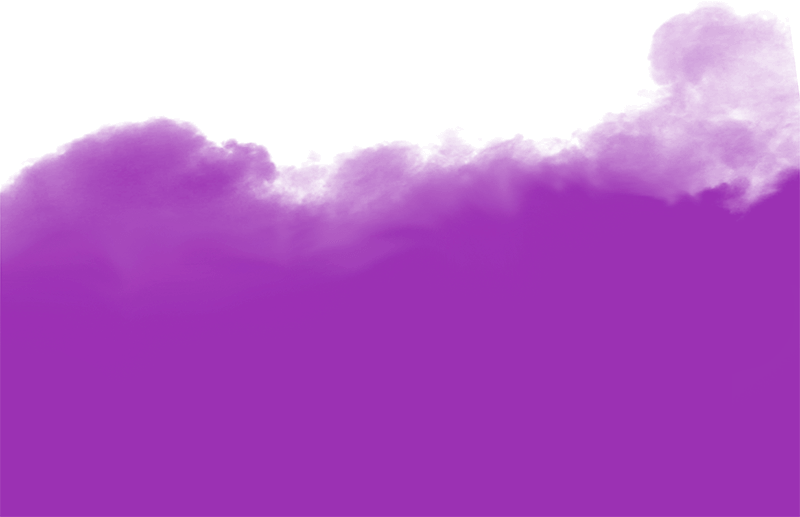

In [30]:
data.text

### All the information for every teams games that season are here after navigating further so i need to inspect and i find the link for every team

#### I want to acces the Leverkusen
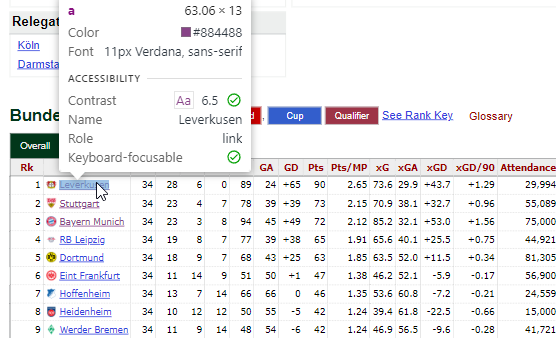 

#### And find that link in the soup

 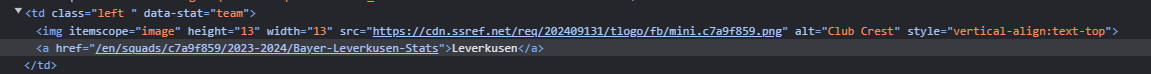

#### Thats how i will narrow my search to just the table

 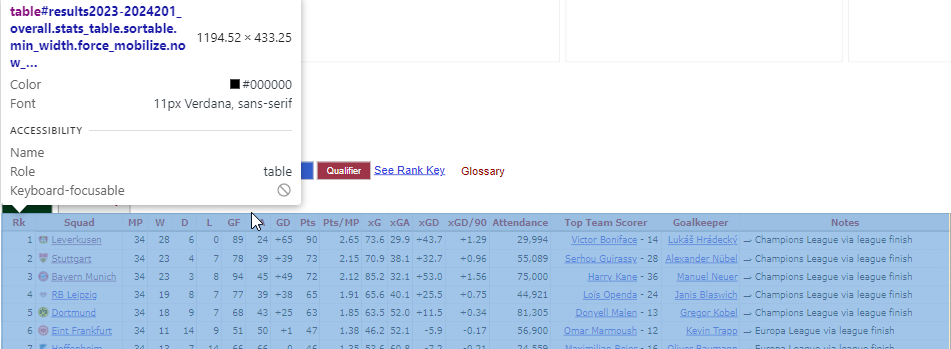


In [72]:
from bs4 import BeautifulSoup

In [73]:
soup = BeautifulSoup(data.text) 

In [74]:
resulsts_table = soup.select('table.stats_table')

In [75]:
resulsts_table ## I narrowed down the soup so i have just the table im intrested in

[<table class="stats_table sortable min_width" data-cols-to-freeze=",1" id="matchlogs_for"> <caption>Shooting <span style="color: #666; font-size:smaller">2022-2023 Southampton: All Competitions</span> Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr class="over_header"> <th aria-label="" class="over_header center" colspan="10" data-stat="header_for_against">For Southampton</th> <th aria-label="" class="over_header center group_start" colspan="10" data-stat="header_standard">Standard</th> <th aria-label="" class="over_header center group_start" colspan="5" data-stat="header_expected">Expected</th><th></th> </tr> <tr> <th aria-label="Date" class="poptip sort_default_asc center" data-over-header="For Southampton" data-stat="date" data-tip="Date listed is local to the match" scope="col">Date</th> <th aria-label="Time" class="poptip so

In [76]:
links = resulsts_table.find_all('a')  ## Looking for all links(tags) across the table

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [26]:
links = [l.get('href') for l in links] # extracting href value through list comprehension

NameError: name 'links' is not defined

In [53]:
links = [l for l in links if '/squads' in l] # now im taking just squad links (the ones we are intrested in)

In [54]:
links # 18 teams 18 links

['/en/squads/054efa67/Bayern-Munich-Stats',
 '/en/squads/c7a9f859/Bayer-Leverkusen-Stats',
 '/en/squads/a486e511/Freiburg-Stats',
 '/en/squads/f0ac8ee6/Eintracht-Frankfurt-Stats',
 '/en/squads/acbb6a5b/RB-Leipzig-Stats',
 '/en/squads/7a41008f/Union-Berlin-Stats',
 '/en/squads/598bc722/Stuttgart-Stats',
 '/en/squads/add600ae/Dortmund-Stats',
 '/en/squads/18d9d2a7/Heidenheim-Stats',
 '/en/squads/a224b06a/Mainz-05-Stats',
 '/en/squads/62add3bf/Werder-Bremen-Stats',
 '/en/squads/0cdc4311/Augsburg-Stats',
 '/en/squads/4eaa11d7/Wolfsburg-Stats',
 '/en/squads/32f3ee20/Monchengladbach-Stats',
 '/en/squads/033ea6b8/Hoffenheim-Stats',
 '/en/squads/b42c6323/Bochum-Stats',
 '/en/squads/54864664/St-Pauli-Stats',
 '/en/squads/2ac661d9/Holstein-Kiel-Stats']

In [55]:
teams_urls = [f"https://fbref.com{l}" for l in links] ## absolute links for every team

In [56]:
teams_urls

['https://fbref.com/en/squads/054efa67/Bayern-Munich-Stats',
 'https://fbref.com/en/squads/c7a9f859/Bayer-Leverkusen-Stats',
 'https://fbref.com/en/squads/a486e511/Freiburg-Stats',
 'https://fbref.com/en/squads/f0ac8ee6/Eintracht-Frankfurt-Stats',
 'https://fbref.com/en/squads/acbb6a5b/RB-Leipzig-Stats',
 'https://fbref.com/en/squads/7a41008f/Union-Berlin-Stats',
 'https://fbref.com/en/squads/598bc722/Stuttgart-Stats',
 'https://fbref.com/en/squads/add600ae/Dortmund-Stats',
 'https://fbref.com/en/squads/18d9d2a7/Heidenheim-Stats',
 'https://fbref.com/en/squads/a224b06a/Mainz-05-Stats',
 'https://fbref.com/en/squads/62add3bf/Werder-Bremen-Stats',
 'https://fbref.com/en/squads/0cdc4311/Augsburg-Stats',
 'https://fbref.com/en/squads/4eaa11d7/Wolfsburg-Stats',
 'https://fbref.com/en/squads/32f3ee20/Monchengladbach-Stats',
 'https://fbref.com/en/squads/033ea6b8/Hoffenheim-Stats',
 'https://fbref.com/en/squads/b42c6323/Bochum-Stats',
 'https://fbref.com/en/squads/54864664/St-Pauli-Stats',
 '

### Im getting soup to test the next steps for first team

In [57]:
team_url = teams_urls[0]
data = requests.get(team_url)

### I wanted from that navigate for link to matchlogs just for Bundesliga Games but some of the links are not working or are hard to scrape so i'll go with all games played that season and then just filter Bundesliga games

#### Once again i can see there's table content
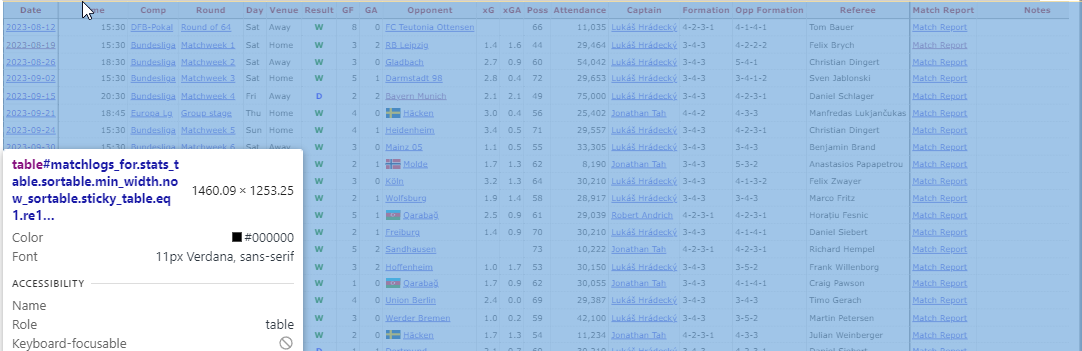
#### And i can see that the table class got certain id
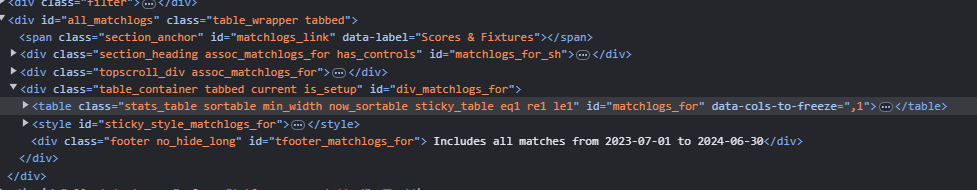

In [58]:
import pandas as pd
games = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})

C:\Users\czarn\AppData\Local\Temp\ipykernel_7928\888341182.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})


In [59]:
games[0]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2024-08-16,20:45,DFB-Pokal,Round of 64,Fri,Away,W,4.0,0.0,Ulm,NaN,NaN,77.0,15000.0,Manuel Neuer,4-2-3-1,5-3-2,NaN,Match Report,NaN
1,2024-08-25,15:30,Bundesliga,Matchweek 1,Sun,Away,W,3.0,2.0,Wolfsburg,2.4,1.9,70.0,30000.0,Manuel Neuer,4-2-3-1,4-2-3-1,NaN,Match Report,NaN
2,2024-09-01,17:30,Bundesliga,Matchweek 2,Sun,Home,W,2.0,0.0,Freiburg,1.5,1.0,66.0,75000.0,Manuel Neuer,4-1-4-1,4-2-3-1,Christian Dingert,Match Report,NaN
3,2024-09-14,18:30,Bundesliga,Matchweek 3,Sat,Away,W,6.0,1.0,Holstein Kiel,3.2,0.3,70.0,15034.0,Manuel Neuer,4-2-3-1,4-3-3,Tobias Reichel,Match Report,NaN
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Home,W,9.0,2.0,hr Dinamo Zagreb,5.9,0.7,70.0,75000.0,Manuel Neuer,4-2-3-1,5-3-2,Juan Martínez,Match Report,NaN
5,2024-09-21,15:30,Bundesliga,Matchweek 4,Sat,Away,W,5.0,0.0,Werder Bremen,3.0,0.0,69.0,42100.0,Joshua Kimmich,4-2-3-1,3-5-2,Bastian Dankert,Match Report,NaN
6,2024-09-28,18:30,Bundesliga,Matchweek 5,Sat,Home,NaN,NaN,NaN,Leverkusen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN
7,2024-10-02,20:00,Champions Lg,League phase,Wed,Away,NaN,NaN,NaN,eng Aston Villa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN
8,2024-10-06,17:30,Bundesliga,Matchweek 6,Sun,Away,NaN,NaN,NaN,Eint Frankfurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN
9,2024-10-19,18:30,Bundesliga,Matchweek 7,Sat,Home,NaN,NaN,NaN,Stuttgart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN


### I want to add more data to that table, i will take shooting stats
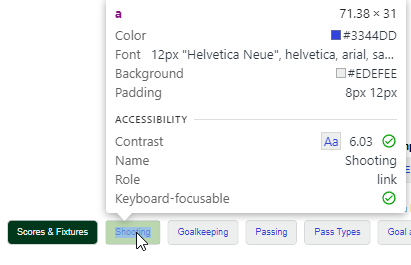
#### I will access the link with the same logic like with team urls

In [60]:
soup = BeautifulSoup(data.text)
links = soup.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if l and 'all_comps/shooting/' in l]


In [61]:
links

['/en/squads/054efa67/2024-2025/matchlogs/all_comps/shooting/Bayern-Munich-Match-Logs-All-Competitions',
 '/en/squads/054efa67/2024-2025/matchlogs/all_comps/shooting/Bayern-Munich-Match-Logs-All-Competitions',
 '/en/squads/054efa67/2024-2025/matchlogs/all_comps/shooting/Bayern-Munich-Match-Logs-All-Competitions',
 '/en/squads/054efa67/2024-2025/matchlogs/all_comps/shooting/Bayern-Munich-Match-Logs-All-Competitions']

In [62]:
data = requests.get(f"https://fbref.com{links[0]}")

In [63]:
shooting = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})[0]

C:\Users\czarn\AppData\Local\Temp\ipykernel_7928\3898655065.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})[0]


In [64]:
shooting

For Bayern Munich                                                            \
               Date   Time          Comp         Round  Day Venue Result   GF   
0        2024-08-16  20:45     DFB-Pokal   Round of 64  Fri  Away      W  4.0   
1        2024-08-25  15:30    Bundesliga   Matchweek 1  Sun  Away      W  3.0   
2        2024-09-01  17:30    Bundesliga   Matchweek 2  Sun  Home      W  2.0   
3        2024-09-14  18:30    Bundesliga   Matchweek 3  Sat  Away      W  6.0   
4        2024-09-17  21:00  Champions Lg  League phase  Tue  Home      W  9.0   
5        2024-09-21  15:30    Bundesliga   Matchweek 4  Sat  Away      W  5.0   
6               NaN    NaN           NaN           NaN  NaN   NaN     --  NaN   

                          ... Standard               Expected               \
    GA          Opponent  ...     Dist   FK PK PKatt       xG npxG npxG/Sh   
0  0.0               Ulm  ...      NaN  NaN  0     0      NaN  NaN     NaN   
1  2.0         Wolfsburg  ...     11.1  0.0  0     0      2.4  2.4    0.16   
2  0.0          Freiburg  ...     16.0  0.0  1     1      1.5  0.8    0.07   
3  1.0     Holstein Kiel  ...     15.9  0.0  1     1      3.2  2.4    0.11   
4  2.0  hr Dinamo Zagreb  ...     18.2  0.0  3     3      5.9  3.9    0.15   
5  0.0     Werder Bremen  ...     17.3  1.0  0     0      3.0  3.0    0.12   
6  NaN               NaN  ...     16.1  1.0  5     5      NaN  NaN    0.13   

                Unnamed: 25_level_0  
   G-xG np:G-xG        Match Report  
0   NaN     NaN        Match Report  
1  -0.4    -0.4        Match Report  
2   0.5     0.2        Match Report  
3   1.8     1.6        Match Report  
4   3.1     2.1        Match Report  
5   2.0     2.0        Match Report  
6  27.0    22.0                 NaN  

[7 rows x 26 columns]

In [65]:
shooting.columns = shooting.columns.droplevel() ## droping multi level indexes

### Im merging that to the games on date since thats a common on two df and its games identifier

In [66]:
team_data = games[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

In [67]:
team_data

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2024-08-16,20:45,DFB-Pokal,Round of 64,Fri,Away,W,4.0,0.0,Ulm,...,5-3-2,NaN,Match Report,NaN,16,7,NaN,NaN,0,0
1,2024-08-25,15:30,Bundesliga,Matchweek 1,Sun,Away,W,3.0,2.0,Wolfsburg,...,4-2-3-1,NaN,Match Report,NaN,15,8,11.1,0.0,0,0
2,2024-09-01,17:30,Bundesliga,Matchweek 2,Sun,Home,W,2.0,0.0,Freiburg,...,4-2-3-1,Christian Dingert,Match Report,NaN,11,2,16.0,0.0,1,1
3,2024-09-14,18:30,Bundesliga,Matchweek 3,Sat,Away,W,6.0,1.0,Holstein Kiel,...,4-3-3,Tobias Reichel,Match Report,NaN,22,11,15.9,0.0,1,1
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Home,W,9.0,2.0,hr Dinamo Zagreb,...,5-3-2,Juan Martínez,Match Report,NaN,26,16,18.2,0.0,3,3
5,2024-09-21,15:30,Bundesliga,Matchweek 4,Sat,Away,W,5.0,0.0,Werder Bremen,...,3-5-2,Bastian Dankert,Match Report,NaN,25,7,17.3,1.0,0,0


### Since im intrested only in Bundesliga games im keeping only those games

In [68]:
team_data = team_data[team_data['Comp'] == 'Bundesliga']

In [69]:
team_data

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
1,2024-08-25,15:30,Bundesliga,Matchweek 1,Sun,Away,W,3.0,2.0,Wolfsburg,...,4-2-3-1,NaN,Match Report,NaN,15,8,11.1,0.0,0,0
2,2024-09-01,17:30,Bundesliga,Matchweek 2,Sun,Home,W,2.0,0.0,Freiburg,...,4-2-3-1,Christian Dingert,Match Report,NaN,11,2,16.0,0.0,1,1
3,2024-09-14,18:30,Bundesliga,Matchweek 3,Sat,Away,W,6.0,1.0,Holstein Kiel,...,4-3-3,Tobias Reichel,Match Report,NaN,22,11,15.9,0.0,1,1
5,2024-09-21,15:30,Bundesliga,Matchweek 4,Sat,Away,W,5.0,0.0,Werder Bremen,...,3-5-2,Bastian Dankert,Match Report,NaN,25,7,17.3,1.0,0,0


### Function to scrape all the seasons

#### Since we got request error i had to overwrite the function so every request will be from diffrent ip for that i used BrigthData (2$ free credits for the start and for this project i used 0.02$)

In [120]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

# Create a list of years from 2022 to 2020 (exclusive) in descending order
years = list(range(2025, 2020, -1))

# Initialize an empty list to store match data for all teams
all_matches = []

# Define the URL for the Bundesliga standings page
standings_url = "https://fbref.com/en/comps/20/Bundesliga-Stats"



# BrightData proxy credentials
username = 'xxxxxx' # Replace with actual username
password = 'xxxxx'  # Replace this with your actual password
proxy_host = 'brd.superproxy.io'
proxy_port = '22225'

# Proxy configuration
proxy = {
    "http": f"http://{username}:{password}@{proxy_host}:{proxy_port}",
    "https": f"http://{username}:{password}@{proxy_host}:{proxy_port}",
}

# Loop through each year in the specified range
for year in years:
    # Request the standings page for the current year using proxy
    data = requests.get(standings_url, proxies=proxy)
    # Parse the HTML content of the page
    soup = BeautifulSoup(data.text, 'html.parser')
    # Select the standings table from the parsed HTML
    standings_table = soup.select('table.stats_table')[0]

    # Extract all links from the standings table
    links = [l.get("href") for l in standings_table.find_all('a')]
    # Filter the links to include only those that contain '/squads/'
    links = [l for l in links if '/squads/' in l]
    # Construct the full URLs for each team's page
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    # Get the link for the previous season's standings
    previous_season = soup.select("a.prev")[0].get("href")
    # Update the standings URL to point to the previous season
    standings_url = f"https://fbref.com{previous_season}"
    
    # Loop through each team's URL to gather data
    for team_url in team_urls:
        # Extract the team name from the URL
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        # Request the team's page using proxy
        data = requests.get(team_url, proxies=proxy)
        # Read the matches data from the team's page
        games = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})
        # Parse the HTML content of the team's page
        soup = BeautifulSoup(data.text, 'html.parser')
        # Extract all links from the team's page
        links = [l.get("href") for l in soup.find_all('a')]
        # Filter the links to find the shooting statistics page
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        
        # Request the shooting statistics page for the team using proxy
        data = requests.get(f"https://fbref.com{links[0]}", proxies=proxy)
        # Read the shooting statistics data into a DataFrame
        shooting = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})[0]
        # Drop the first level of the column MultiIndex
        shooting.columns = shooting.columns.droplevel()
        # If shooting data are not available then ignore and continue
        try:
            # Merge the matches data with the shooting statistics on the "Date" column
            team_data = games[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            # If there's a ValueError during merging, skip to the next iteration
            continue
        
        # Filter the merged data to include only Bundesliga matches
        team_data = team_data[team_data["Comp"] == "Bundesliga"]
        
        # Add the season year and team name to the data
        team_data["Season"] = year
        team_data["Team"] = team_name
        # Append the team data to the list of all matches
        all_matches.append(team_data)
        # Pause execution for 1 second to avoid overwhelming the server
        time.sleep(1)


C:\Users\czarn\AppData\Local\Temp\ipykernel_840\1801771444.py:57: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})
C:\Users\czarn\AppData\Local\Temp\ipykernel_840\1801771444.py:68: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})[0]
C:\Users\czarn\AppData\Local\Temp\ipykernel_840\1801771444.py:57: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(data.text, attrs={'id': 'matchlogs_for'})
C:\Users\czarn\AppData\Local\Temp\ipykernel_840\1801771444.py:68: FutureWarning: Passing liter

KeyboardInterrupt: 

In [99]:
match_df = pd.concat(all_matches)

In [102]:
match_df.columns = [c.lower() for c in match_df.columns]

In [104]:
match_df.to_csv('bundesliga_matches.csv')

## the next goal to update my data table is to scrape annual salary for the team for every season

In [61]:
results_url = "https://fbref.com/en/comps/20/Bundesliga-Stats"
data = requests.get(results_url)
soup = BeautifulSoup(data.text) 

In [62]:
resulsts_table = soup.select('table.stats_table')[0]

In [63]:
resulsts_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2024-2025201_overall"> <caption>Bundesliga Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Matche

In [64]:
links = resulsts_table.find_all('a') 
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]

In [11]:
team_urls = [f"https://fbref.com{l}" for l in links]

In [14]:
team_urls

['https://fbref.com/en/squads/054efa67/Bayern-Munich-Stats',
 'https://fbref.com/en/squads/c7a9f859/Bayer-Leverkusen-Stats',
 'https://fbref.com/en/squads/a486e511/Freiburg-Stats',
 'https://fbref.com/en/squads/f0ac8ee6/Eintracht-Frankfurt-Stats',
 'https://fbref.com/en/squads/acbb6a5b/RB-Leipzig-Stats',
 'https://fbref.com/en/squads/7a41008f/Union-Berlin-Stats',
 'https://fbref.com/en/squads/598bc722/Stuttgart-Stats',
 'https://fbref.com/en/squads/add600ae/Dortmund-Stats',
 'https://fbref.com/en/squads/18d9d2a7/Heidenheim-Stats',
 'https://fbref.com/en/squads/a224b06a/Mainz-05-Stats',
 'https://fbref.com/en/squads/62add3bf/Werder-Bremen-Stats',
 'https://fbref.com/en/squads/0cdc4311/Augsburg-Stats',
 'https://fbref.com/en/squads/4eaa11d7/Wolfsburg-Stats',
 'https://fbref.com/en/squads/32f3ee20/Monchengladbach-Stats',
 'https://fbref.com/en/squads/033ea6b8/Hoffenheim-Stats',
 'https://fbref.com/en/squads/b42c6323/Bochum-Stats',
 'https://fbref.com/en/squads/54864664/St-Pauli-Stats',
 '

In [ ]:
data = requests.get(team_urls[0])

In [69]:
soup = BeautifulSoup(data.text)


In [40]:
wages_link = soup.find_all("a", text="Wages")

C:\Users\czarn\AppData\Local\Temp\ipykernel_840\3794234357.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  wages_link = soup.find_all("a", text="Wages")


In [41]:
wages_link

[<a href="/en/squads/054efa67/2024-2025/wages/Bayern-Munich-Wage-Details">Wages</a>,
 <a href="/en/squads/054efa67/2024-2025/wages/Bayern-Munich-Wage-Details">Wages</a>,
 <a href="/en/squads/054efa67/2024-2025/wages/Bayern-Munich-Wage-Details">Wages</a>]

In [43]:
soup = BeautifulSoup(data.text)
links = soup.find_all("a", text="Wages")
links = [l.get("href") for l in links]
links = [l for l in links if l]

C:\Users\czarn\AppData\Local\Temp\ipykernel_840\1091824483.py:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  links = soup.find_all("a", text="Wages")


In [57]:
links[0]

'/en/squads/054efa67/2024-2025/wages/Bayern-Munich-Wage-Details'

In [44]:
wages_urls = [f"https://fbref.com{l}" for l in links]

In [46]:
data = requests.get(wages_urls[0])

In [52]:
wages = pd.read_html(data.text, attrs={'id': 'wages'})

C:\Users\czarn\AppData\Local\Temp\ipykernel_840\89918681.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  wages = pd.read_html(data.text, attrs={'id': 'wages'})


In [54]:
wages = wages[0]

In [ ]:
wages

### Loop to scrape everything with multiple debbuging added while developing it

In [169]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
import time

# List of years to scrape from (2025 to 2021)
years = list(range(2025, 2020, -1))

# Initialize an empty DataFrame to store wages data for all teams and seasons
final_wages_df = pd.DataFrame()

# BrightData proxy credentials
username = 'brd-customer-hl_0541c383-zone-datacenter_proxy1'  # Replace with actual username
password = 'vow3247oe5ks'  # Replace with actual password
proxy_host = 'brd.superproxy.io'
proxy_port = '22225'

# Proxy configuration
proxy = {
    "http": f"http://{username}:{password}@{proxy_host}:{proxy_port}",
    "https": f"http://{username}:{password}@{proxy_host}:{proxy_port}",
}

# Function to check request status and handle errors
def get_request(url, proxy, retries=3):
    for attempt in range(retries):
        response = requests.get(url, proxies=proxy)
        if response.status_code == 200:
            return response
        else:
            print(f"Error {response.status_code} for {url}, retrying ({attempt + 1}/{retries})...")
            time.sleep(2)
    print(f"Failed to retrieve {url} after {retries} attempts.")
    return None

# Loop through each year to scrape wages data
for year in years:
    if year == 2025:
        # URL for the current season (2024-2025)
        standings_url = "https://fbref.com/en/comps/20/Bundesliga-Stats"
    else:
        # URL for past seasons
        standings_url = f"https://fbref.com/en/comps/20/{year-1}-{year}/{year-1}-{year}-Bundesliga-Stats"

    print(f"Scraping data for season {year}...")

    # Request the standings page for the current season using proxy
    response = get_request(standings_url, proxy)
    if response is None:
        print(f"Failed to retrieve standings page for season {year}, skipping...")
        continue

    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the standings table
    standings_table = soup.select('table.stats_table')[0]

    # Extract team URLs for this season
    links = [l.get("href") for l in standings_table.find_all('a')]
    team_urls = [f"https://fbref.com{l}" for l in links if '/squads/' in l]

    print(f"Found {len(team_urls)} team URLs for season {year}")
    
    # Loop through each team's page
    for team_url in team_urls:
        # Extract the team name and ID from the URL
        team_parts = team_url.split("/")
        
        # Extract team ID based on the URL structure
        if year == 2025:
            team_id = team_parts[-2]  # For the first season (2025)
        else:
            team_id = team_parts[-3]  # For subsequent seasons
            
        team_name = team_parts[-1].replace("-Stats", "").replace("-", " ")

        print(f"Scraping wages data for {team_name} in season {year}...")

        # Construct the correct wages URL using the team ID and the correct season format
        wages_url = f"https://fbref.com/en/squads/{team_id}/{year - 1}-{year}/wages/{team_name.replace(' ', '-')}-Wage-Details"
        print(f"Wages URL: {wages_url}")

        # Request the wages page using proxy
        response = get_request(wages_url, proxy)
        if response is None:
            print(f"Failed to retrieve wages page for {team_name}, skipping...")
            continue

        # Read the wages table using StringIO to avoid warning
        try:
            wages = pd.read_html(StringIO(response.text), attrs={'id': 'wages'})[0]
        except ValueError:
            print(f"No wages data found for {team_name}, skipping...")
            continue
        
        # Add team name and season to the wages DataFrame
        wages['Team Name'] = team_name
        wages['Season'] = year

        final_wages_df = pd.concat([final_wages_df, wages], ignore_index=True)

        # Pause for a second to avoid overwhelming the server
        time.sleep(1)

# Show the final DataFrame with all teams' wages data
print(final_wages_df)


Scraping data for season 2025...
Found 18 team URLs for season 2025
Scraping wages data for Bayern Munich in season 2025...
Wages URL: https://fbref.com/en/squads/054efa67/2024-2025/wages/Bayern-Munich-Wage-Details
Scraping wages data for Bayer Leverkusen in season 2025...
Wages URL: https://fbref.com/en/squads/c7a9f859/2024-2025/wages/Bayer-Leverkusen-Wage-Details
Scraping wages data for Freiburg in season 2025...
Wages URL: https://fbref.com/en/squads/a486e511/2024-2025/wages/Freiburg-Wage-Details
Scraping wages data for Eintracht Frankfurt in season 2025...
Wages URL: https://fbref.com/en/squads/f0ac8ee6/2024-2025/wages/Eintracht-Frankfurt-Wage-Details
Scraping wages data for RB Leipzig in season 2025...
Wages URL: https://fbref.com/en/squads/acbb6a5b/2024-2025/wages/RB-Leipzig-Wage-Details
Scraping wages data for Union Berlin in season 2025...
Wages URL: https://fbref.com/en/squads/7a41008f/2024-2025/wages/Union-Berlin-Wage-Details
Scraping wages data for Stuttgart in season 2025..

In [174]:
final_wages_df.to_csv('final_wages_df_base.csv')

In [171]:
def extract_first_number(wage):
    if isinstance(wage, str):  # Check if the value is a string
        return wage.split(' ')[1].replace(',', '')
    return wage  # Return the value as is if it's not a string

# Apply the function to both Weekly Wages and Annual Wages
final_wages_df['Weekly Wages'] = final_wages_df['Weekly Wages'].apply(extract_first_number)
final_wages_df['Annual Wages'] = final_wages_df['Annual Wages'].apply(extract_first_number)


In [176]:
final_wages_df['Annual Wages'] = final_wages_df['Annual Wages'].astype(float) # change to float

#### I saved df to csv file then i cleaned it a little bit

In [177]:
# Group by 'Team Name' and 'Season' and sum the 'Annual Wages (EUR)' for each group
team_season_wages = final_wages_df.groupby(['Team Name', 'Season'])['Annual Wages'].sum().reset_index()

# Rename the column for clarity
team_season_wages.rename(columns={'Annual Wages': 'Total Annual Wages (EUR)'}, inplace=True)




,Team Name,Season,Total Annual Wages (EUR)
0,Arminia,2021,9590000.0
1,Arminia,2022,9880000.0
2,Augsburg,2021,22920000.0
3,Augsburg,2022,24000000.0
4,Augsburg,2023,26070000.0
5,Augsburg,2024,24360000.0
6,Augsburg,2025,26480000.0
7,Bayer Leverkusen,2021,56200000.0
8,Bayer Leverkusen,2022,47660000.0
9,Bayer Leverkusen,2023,57330000.0


In [178]:
team_season_wages.to_csv('team_season_wages.csv')

In [27]:
import pandas as pd

# Load the datasets


# Reading the CSV files
team_salaries = pd.read_csv('team_season_wages_updated_names.csv')
matches_df = pd.read_csv('bundesliga_matches.csv')


# Step 2: Merge the salary data into the bundesliga_matches dataframe for both home and away teams
# First, we will merge for the 'team' column (assumed to be the home team or team in focus)
matches_with_home_salaries = matches_df.merge(
    team_salaries, 
    left_on=['team', 'season'], 
    right_on=['Team Name', 'Season'], 
    how='left'
).rename(columns={'Total Annual Wages (EUR)': 'home_team_salary'})

# Step 3: Merge salaries for the away team (assuming the opponent column represents away team)
matches_with_full_salaries = matches_with_home_salaries.merge(
    team_salaries, 
    left_on=['opponent', 'season'], 
    right_on=['Team Name', 'Season'], 
    how='left'
).rename(columns={'Total Annual Wages (EUR)': 'away_team_salary'})

# Step 4: Drop unnecessary columns from the merge (like duplicate 'Team Name' and 'Season' columns)
matches_with_full_salaries.drop(columns=['Team Name_x', 'Season_x', 'Team Name_y', 'Season_y'], inplace=True)

# Display the updated matches dataframe with salary columns
print(matches_with_full_salaries.head())


   Unnamed: 0_x        date   time        comp        round  day venue result  \
0             1  2024-08-25  15:30  Bundesliga  Matchweek 1  Sun  Away      W   
1             2  2024-09-01  17:30  Bundesliga  Matchweek 2  Sun  Home      W   
2             3  2024-09-14  18:30  Bundesliga  Matchweek 3  Sat  Away      W   
3             5  2024-09-21  15:30  Bundesliga  Matchweek 4  Sat  Away      W   
4             1  2024-08-23  20:30  Bundesliga  Matchweek 1  Fri  Away      W   

    gf   ga  ...  dist   fk  pk  pkatt  season              team Unnamed: 0_y  \
0  3.0  2.0  ...  11.1  0.0   0      0    2025     Bayern Munich         16.0   
1  2.0  0.0  ...  16.0  0.0   1      1    2025     Bayern Munich         16.0   
2  6.0  1.0  ...  15.9  0.0   1      1    2025     Bayern Munich         16.0   
3  5.0  0.0  ...  17.3  1.0   0      0    2025     Bayern Munich         16.0   
4  3.0  2.0  ...  18.3  1.0   0      1    2025  Bayer Leverkusen          NaN   

  home_team_salary Unnamed

In [30]:
matches_with_full_salaries.to_csv('bundesliga_matches_salaries.csv')

In [23]:
bundesliga_matches_salaries = pd.read_csv('bundesliga_matches_salaries.csv')

In [19]:
# Count null values for home team salary by team
home_nulls = bundesliga_matches_salaries[bundesliga_matches_salaries['home_team_salary'].isna()].groupby('team').size().reset_index(name='home_null_count')

# Count null values for away team salary by team (using 'opponent' as the away team)
away_nulls = bundesliga_matches_salaries[bundesliga_matches_salaries['away_team_salary'].isna()].groupby('opponent').size().reset_index(name='away_null_count')

# Merge both home and away null counts to get total null values per team
null_counts = pd.merge(home_nulls, away_nulls, left_on='team', right_on='opponent', how='outer').fillna(0)

# Calculate total null values for each team (home + away)
null_counts['total_nulls'] = null_counts['home_null_count'] + null_counts['away_null_count']

# Display teams sorted by most null values
null_counts[['team', 'total_nulls']].sort_values(by='total_nulls', ascending=False)

C:\Users\czarn\AppData\Local\Temp\ipykernel_732\3220333127.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  null_counts = pd.merge(home_nulls, away_nulls, left_on='team', right_on='opponent', how='outer').fillna(0)


,team,total_nulls
0,0,140.0
1,0,140.0
4,0,140.0
3,0,136.0
2,0,34.0
5,0,4.0


#### it means we dont have missmatches

### The rest small adjustments were made in Excel